In [2]:
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def plotflux(np2darray, plot_title):
    plt.imshow(np2darray, cmap='hot', interpolation='nearest')
    plt.title(plot_title)
    plt.colorbar()
    plt.show()
#    plt.savefig(plot_title+".png")

In [4]:
# import bert data
hin = h5py.File("../repos/PRAD_s87827_Bert-1hr_proc.h5", 'r')
bert_data = hin['BERT/IMAGE'] 
bert_x = hin['BERT/X'].value
bert_y = hin['BERT/Y'].value

In [5]:
# import ernie data
hin_e = h5py.File("../repos/PRAD_s87827_Ernie-2hr_proc.h5", 'r')
ernie_data = hin_e['ERNIE/IMAGE'].value
ernie_x = hin_e['ERNIE/X'].value
ernie_y = hin_e['ERNIE/Y'].value

In [6]:
# find binsizes
diffbert = []
for i in range(1, len(bert_x)-1 ) :
    diffbert.append(bert_x[i+1] - bert_x[i])

differnie = []
for i in range(1, len(ernie_y) - 1 ) :
    differnie.append(ernie_y[i+1] - ernie_y[i])

bert_diff = diffbert[0] * 0.0625
ernie_diff = differnie[0] * 0.0625 # scaling by 16 from the coord to 6mm
print(bert_diff)
print(ernie_diff)
bert_dim = len(bert_x)
ernie_dim = len(ernie_x)
print(bert_y)

0.020412500969541725
0.021162501005164813
[ 0.          0.32660002  0.65320003  0.97980005  1.30640006  1.63300008
  1.95960009  2.28620011  2.61280012  2.93940014  3.26600016  3.59260017
  3.91920019  4.2458002   4.57240022  4.89900023  5.22560025  5.55220026
  5.87880028  6.20540029  6.53200031  6.85860033  7.18520034  7.51180036
  7.83840037  8.16500039  8.4916004   8.81820042  9.14480043  9.47140045
  9.79800047 10.12460048 10.4512005  10.77780051 11.10440053 11.43100054
 11.75760056 12.08420057 12.41080059 12.7374006  13.06400062 13.39060064
 13.71720065 14.04380067 14.37040068 14.6970007  15.02360071 15.35020073
 15.67680074 16.00340076 16.33000078 16.65660079 16.98320081 17.30980082
 17.63640084 17.96300085 18.28960087 18.61620088 18.9428009  19.26940092
 19.59600093 19.92260095 20.24920096 20.57580098 20.90240099 21.22900101
 21.55560102 21.88220104 22.20880105 22.53540107 22.86200109 23.1886011
 23.51520112 23.84180113 24.16840115 24.49500116 24.82160118 25.14820119
 25.474801

In [7]:
# format data into square 2D numpy arrays of side length bert_dim/ernie_dim
np_bert = np.array(bert_data)
np_bert = np.reshape(np_bert, (bert_dim, bert_dim))
np_bert

np_ernie = np.array(ernie_data)
np_ernie = np.reshape(np_ernie, (ernie_dim, ernie_dim))
np_ernie

for i in range (0, len(np_bert)):
    for j in range (0, len(np_bert[0])):
        if (np_bert[i][j] == 0) :
            np_bert[i][j] = 1


for i in range (0, len(np_ernie)):
    for j in range (0, len(np_ernie[0])):
        if (np_ernie[i][j] == 0) :
            np_ernie[i][j] = 1



In [8]:
np.savetxt("bert.txt", np_bert, delimiter=',')
np.savetxt("ernie.txt", np_ernie, delimiter=',')


In [9]:
mask_bert_x = (bert_x > 2.6*16) & (bert_x < 2.65*16)
mask_bert_x_square = np.array([mask_bert_x])
print(mask_bert_x_square)
for i in range (0, 293):
    mask_bert_x_square = np.append(mask_bert_x_square, [mask_bert_x], axis = 0)
mask_bert_y = (bert_y > 3.39*16) & (bert_y < 3.45*16)
mask_bert_y_square = mask_bert_y.reshape((-1,1))

for i in range (0, 293):
    mask_bert_y_square = np.concatenate((mask_bert_y_square, mask_bert_y.reshape((-1,1))), axis=1)
mask_bert = np.bitwise_and(mask_bert_x_square, mask_bert_y_square)

bert_base_value = np.average(np_bert[mask_bert])
print(bert_base_value)
bert_base = np.zeros(np_bert.shape)
bert_base.fill(bert_base_value)

bert_avg_val = np.average(np_bert)
bert_avg = np.zeros(np_bert.shape)
bert_avg.fill(bert_avg_val)
print(bert_avg)

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False  True  True False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False 

In [10]:
mask_ernie_x = (ernie_x > 2.6*16) & (ernie_x < 2.65*16)
mask_ernie_x_square = np.array([mask_ernie_x])
print(mask_ernie_x_square)
for i in range (0, 283):
    mask_ernie_x_square = np.append(mask_ernie_x_square, [mask_ernie_x], axis = 0)
mask_ernie_y = (ernie_y > 3.39*16) & (ernie_y < 3.45*16)
mask_ernie_y_square = mask_ernie_y.reshape((-1,1))

for i in range (0, 283):
    mask_ernie_y_square = np.concatenate((mask_ernie_y_square, mask_ernie_y.reshape((-1,1))), axis=1)
mask_ernie = np.bitwise_and(mask_ernie_x_square, mask_ernie_y_square)

ernie_base_value = np.average(np_ernie[mask_ernie])
print(ernie_base_value)

ernie_base = np.zeros(np_ernie.shape)
ernie_base.fill(ernie_base_value)

ernie_avg_val = np.average(np_ernie)
ernie_avg = np.zeros(np_ernie.shape)
ernie_avg.fill(ernie_avg_val)
print(ernie_avg_val)

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False  True  True  True False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False 

In [11]:
np.savetxt("bert_base.txt", bert_base, delimiter=',')
np.savetxt("ernie_base.txt", ernie_base, delimiter=',')
np.savetxt("bert_avg.txt", bert_avg, delimiter=',')
np.savetxt("ernie_avg.txt", ernie_avg, delimiter=',')

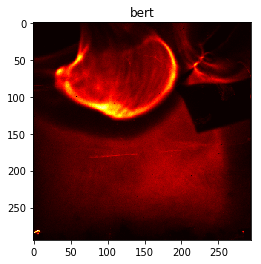

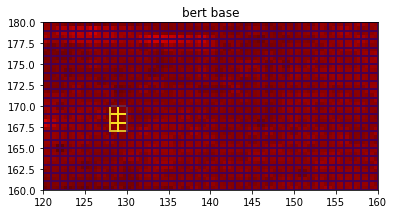

In [12]:
plt.imshow(np_bert, cmap='hot', interpolation='nearest')
plt.title("bert")
plt.show()
plt.imshow(np_bert, cmap='hot', interpolation='nearest')
plt.title("bert")
plt.pcolormesh(mask_bert, facecolor='none', edgecolor='blue', alpha=0.8, zorder=2)
plt.title("bert base")
plt.xlim(120,160)
plt.ylim(160,180)
plt.show()

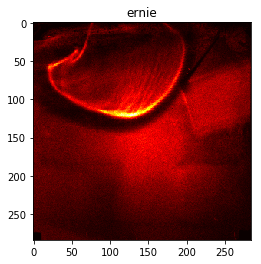

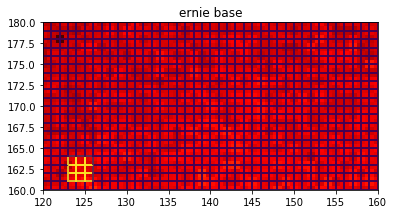

In [13]:
plt.imshow(np_ernie, cmap='hot', interpolation='nearest')
plt.title("ernie")
plt.show()
plt.imshow(np_ernie, cmap='hot', interpolation='nearest')
plt.title("ernie")
plt.pcolormesh(mask_ernie, facecolor='none', edgecolor='blue', alpha=0.8, zorder=2)
plt.title("ernie base")
plt.xlim(120,160)
plt.ylim(160,180)
plt.show()

In [14]:
crop_ernie_x = ernie_x < 4.3 *16
# for i in range (0, len(ernie_x)-1):
#    if ernie_x[i] > 4.3*16:
#        print(i)

crop_ex = 204
crop_ey = 161
#for i in range (0, len(ernie_y)-1):
#    if ernie_y[i] > 3.4*16:
#        print(i)

In [15]:
crop_by = 172
crop_bx = 211

Bert cropped from 0 to 3.2864126560962177 in y, 0.4082500193908345 to 4.2662127026342205 in x
Ernie cropped from 0.6348750301549444 to 3.8092501809296664 in y, 0.21162501005164813 to 4.465287712089776 in x
(150, 201)


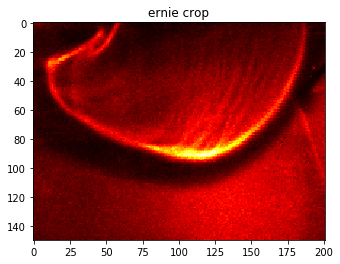

In [16]:
np_crop_bert = np_bert[:161, 20:209]
np_crop_ernie = np_ernie[30:180, 10:211]

by2 = bert_diff*161
bx1 = bert_diff*20
bx2 = bert_diff*209
ey1 = ernie_diff*30
ey2 = ernie_diff*180
ex1 = ernie_diff*10
ex2 = ernie_diff*211
print("Bert cropped from 0 to "+str(by2)+" in y, "+str(bx1)+" to "+str(bx2)+" in x")
print("Ernie cropped from "+str(ey1)+" to "+str(ey2)+" in y, "+str(ex1)+" to "+str(ex2)+" in x")

plt.imshow(np_crop_ernie, cmap='hot', interpolation='nearest')
plt.title("ernie crop")
plt.savefig("Cropped ernie flux.png")
print(np_crop_ernie.shape)

(161, 189)


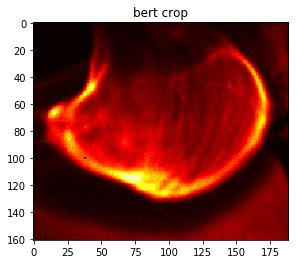

In [17]:
plt.imshow(np_crop_bert, cmap='hot', interpolation='nearest')
plt.title("bert crop")
plt.savefig("Cropped bert flux.png")
print(np_crop_bert.shape)

(150, 201)


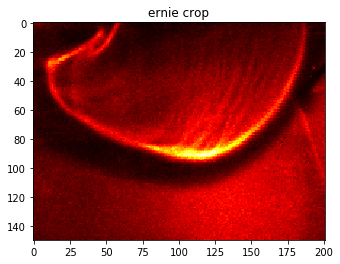

In [18]:
plt.imshow(np_crop_ernie, cmap='hot', interpolation='nearest')
plt.title("ernie crop")
plt.savefig("Cropped ernie flux.png")
print(np_crop_ernie.shape)

In [19]:
np.savetxt("bertcrop.txt", np_crop_bert, delimiter=',')
np.savetxt("erniecrop.txt", np_crop_ernie, delimiter=',')

In [20]:
bert_crop_base = np.zeros(np_crop_bert.shape)
bert_crop_base.fill(bert_base_value)

ernie_crop_base = np.zeros(np_crop_ernie.shape)
ernie_crop_base.fill(ernie_base_value)

np.savetxt("bertcrop_base.txt", bert_crop_base, delimiter=',')
np.savetxt("erniecrop_base.txt", ernie_crop_base, delimiter=',')

In [21]:
"""
Filtering Code: applying different sized Gaussian filters
to 
np_bert
and 
np_ernie
"""

bert_pix = np_bert.shape[0]
perc50 = .5 * bert_pix
perc40 = .4 * bert_pix
perc30 = .3 * bert_pix
perc20 = .2 * bert_pix
perc10 = .1 * bert_pix
perc05 = .05 * bert_pix
perc025 = .025 * bert_pix

ernie_pix = np_ernie.shape[0]
eperc50 = .5 * ernie_pix
eperc40 = .4 * ernie_pix
eperc30 = .3 * ernie_pix
eperc20 = .2 * ernie_pix
eperc10 = .1 * ernie_pix
eperc05 = .05 * ernie_pix
eperc025 = .025 * ernie_pix

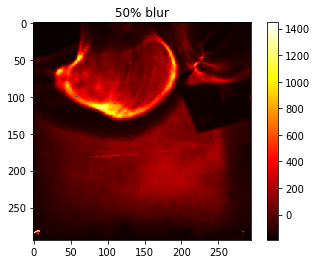

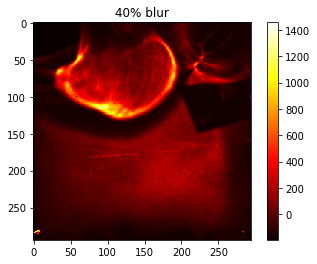

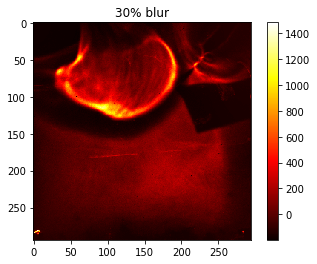

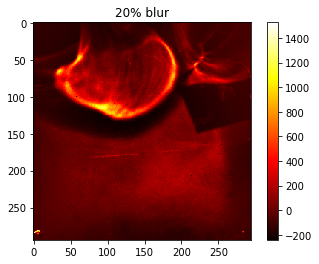

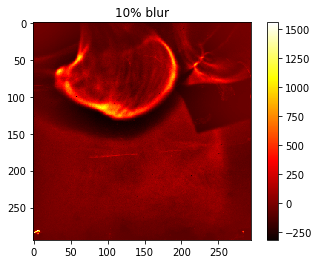

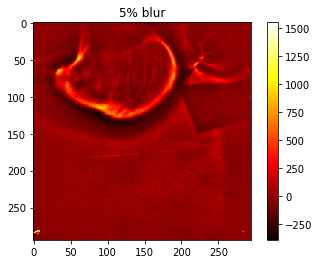

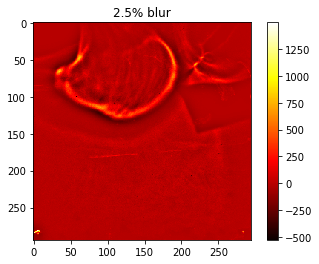

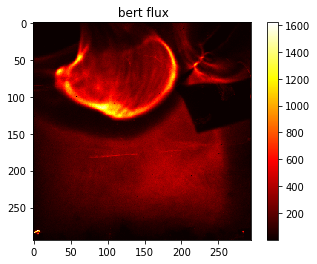

In [22]:
bert50 = np_bert - filt.gaussian_filter(np_bert, perc50)
plotflux(bert50, "50% blur")
bert40 = np_bert - filt.gaussian_filter(np_bert, perc40)
plotflux(bert40, "40% blur")
bert30 = np_bert - filt.gaussian_filter(np_bert, perc30)
plotflux(bert30, "30% blur")
bert20 = np_bert - filt.gaussian_filter(np_bert, perc20)
plotflux(bert20, "20% blur")
bert10 = np_bert - filt.gaussian_filter(np_bert, perc10)
plotflux(bert10, "10% blur")
bert05 = np_bert - filt.gaussian_filter(np_bert, perc05)
plotflux(bert05, "5% blur")


bert025 = np_bert - filt.gaussian_filter(np_bert, perc025)
plotflux(bert025, "2.5% blur")


plotflux(np_bert, " bert flux")

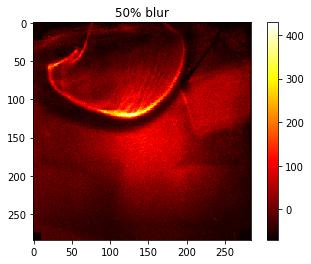

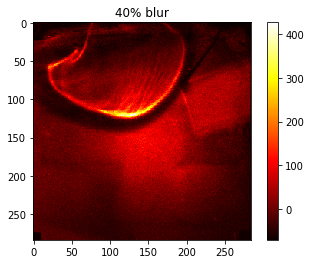

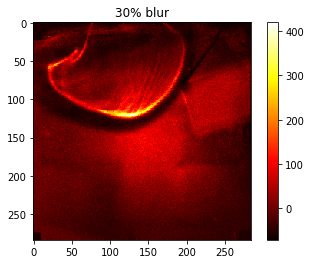

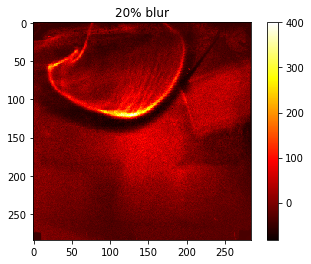

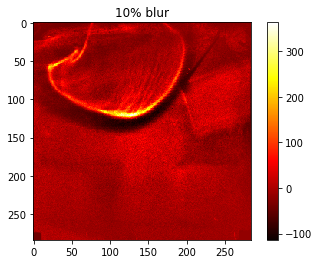

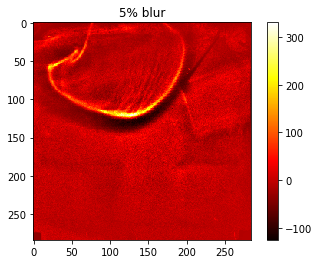

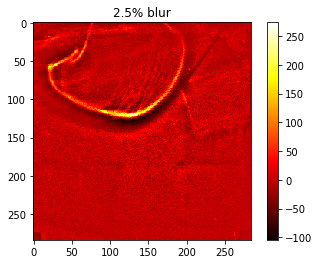

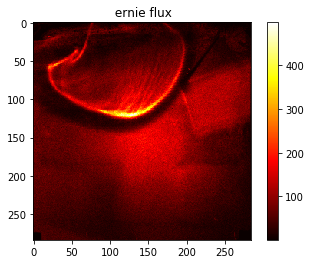

In [32]:
ernie50 = np_ernie - filt.gaussian_filter(np_ernie, perc50)
plotflux(ernie50, "50% blur")
ernie40 = np_ernie - filt.gaussian_filter(np_ernie, perc40)
plotflux(ernie40, "40% blur")
ernie30 = np_ernie - filt.gaussian_filter(np_ernie, perc30)
plotflux(ernie30, "30% blur")
ernie20 = np_ernie - filt.gaussian_filter(np_ernie, perc20)
plotflux(ernie20, "20% blur")
ernie10 = np_ernie - filt.gaussian_filter(np_ernie, perc10)
plotflux(ernie10, "10% blur")
ernie05 = np_ernie - filt.gaussian_filter(np_ernie, perc05)
plotflux(ernie05, "5% blur")


ernie025 = np_ernie - filt.gaussian_filter(np_ernie, perc025)
plotflux(ernie025, "2.5% blur")


plotflux(np_ernie, " ernie flux")

In [24]:
bert10avg = np.average(bert10)
print(bert10avg)
bert10min = np.min(bert10)
bert_avg = np.average(np_bert)

9.0384793e-07


In [25]:
bert10_base_value = np.average(bert10[mask_bert])
print(bert10_base_value)
bert_base_value = np.average(np_bert[mask_bert])
print(bert_base_value)

27.110907
298.33334


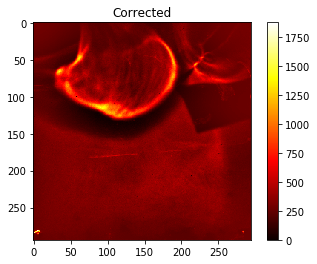

In [26]:
bert10_bkg = np.zeros(bert10.shape)
bert10_bkg.fill(-1*bert10min)

corrected = bert10 + bert10_bkg
plotflux(corrected, "Corrected")

In [27]:
ernie10avg = np.average(ernie10)
print(ernie10avg)
ernie10min = np.min(ernie10)
ernie10max = np.max(np_ernie)
ernie_avg = np.average(np_ernie)
print(ernie10min)
print(ernie10max)
print(ernie_avg)

4.843099e-08
-113.73805
498.0
68.72819


In [28]:
ernie10_base_value = np.average(ernie10[mask_ernie])
print(ernie10_base_value)
ernie_base_value = np.average(np_ernie[mask_ernie])
print(ernie_base_value)

38.715164
163.22223


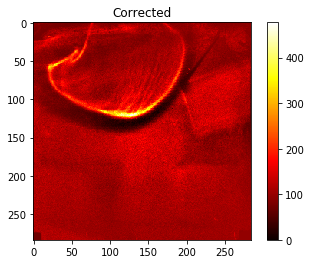

In [50]:
ernie10_bkg = np.zeros(ernie10.shape)
ernie10_bkg.fill(-1*ernie10min)

correctede = ernie10 + ernie10_bkg
plotflux(correctede, "Corrected")

-294.84366
3178.3447
179.0715
325.44424


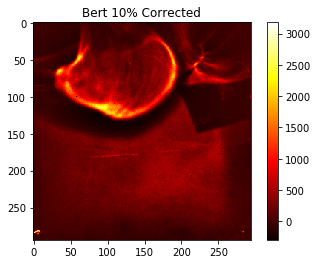

In [29]:
bert102 = (np_bert + bert10)
print(np.min(bert102))
print(np.max(bert102))
print(np.average(bert102))
print(np.average(bert102[mask_bert]))
plotflux(bert102, "Bert 10% Corrected")

In [1]:
ernie102 = (np_ernie + ernie10)
print(np.min(ernie102))
print(np.max(ernie102))
print(np.average(ernie102))
print(np.average(ernie102[mask_ernie]))
plotflux(ernie102, "Ernie 10% Corrected")

NameError: name 'np_ernie' is not defined